In [12]:
penguin_df = pd.read_csv('penguins.csv')
print(penguin_df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [13]:
print(penguin_df.shape[0])
print(penguin_df.isna().sum())
penguin_df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)


344
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [14]:
# Assuming penguin_df is your DataFrame containing the penguin data

# Importing pandas library
import pandas as pd

# Calculate mode of 'sex' column
mode_sex = penguin_df['sex'].mode()[0]

# Fill NaN values in 'sex' column with the mode
penguin_df['sex'] = penguin_df['sex'].fillna(mode_sex)
print(penguin_df.isna().sum())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


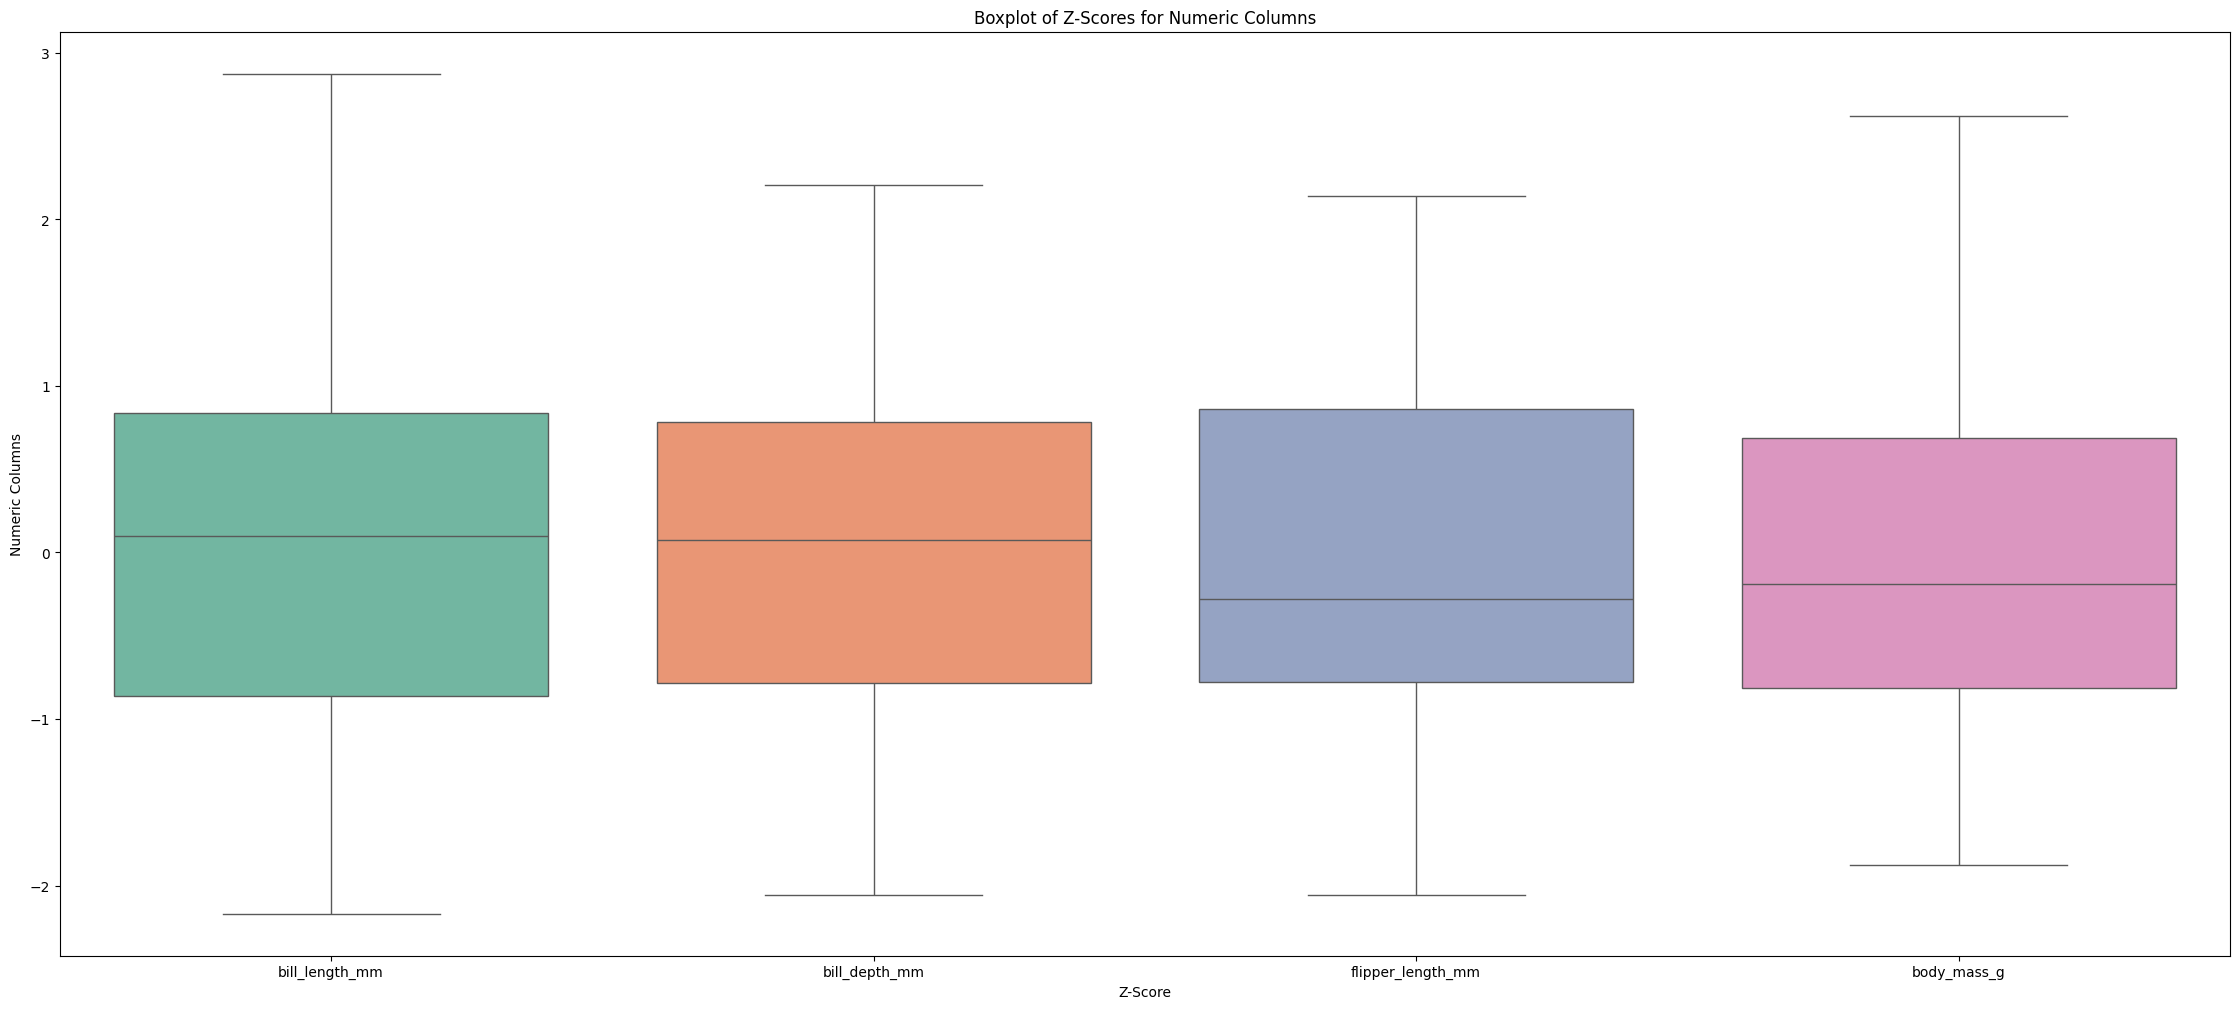

Total outlier rows => 0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import zscore

# # Assuming penguin_df is your DataFrame containing the penguin data

# # Select numeric columns for normalization
# numeric_columns = penguin_df.select_dtypes(include='number')

# # Normalize the numeric columns
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(numeric_columns)


# Calculate z-scores for each numeric column
z_scores = zscore(penguin_df.select_dtypes(include=np.number))

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=penguin_df.select_dtypes(include=np.number).columns)

# Set up the boxplot figure
plt.figure(figsize=(28, 12))

# Draw boxplots for each numeric column
sns.boxplot(data=z_scores_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
outlier_rows = penguin_df[(abs_z_scores > threshold).any(axis=1)]
print("Total outlier rows =>", outlier_rows.shape[0])
penguin_df = penguin_df[(abs_z_scores <= threshold).all(axis=1)]





In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

penguin_df['species'] = label_encoder.fit_transform(penguin_df.species)

In [17]:

penguin_df = pd.get_dummies(penguin_df)
penguin_df = penguin_df.replace({True:1, False:0})
print(penguin_df.head())

   species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0        0            39.1           18.7              181.0       3750.0   
1        0            39.5           17.4              186.0       3800.0   
2        0            40.3           18.0              195.0       3250.0   
4        0            36.7           19.3              193.0       3450.0   
5        0            39.3           20.6              190.0       3650.0   

   island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0              0             0                 1           0         1  
1              0             0                 1           1         0  
2              0             0                 1           1         0  
4              0             0                 1           1         0  
5              0             0                 1           0         1  


/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_6218/3160784730.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguin_df = penguin_df.replace({True:1, False:0})


species              1.000000
bill_length_mm       0.731369
bill_depth_mm       -0.744076
flipper_length_mm    0.854307
body_mass_g          0.750491
island_Biscoe        0.608185
island_Dream        -0.312855
island_Torgersen    -0.431225
sex_FEMALE          -0.009790
sex_MALE             0.009790
Name: species, dtype: float64


<Axes: >

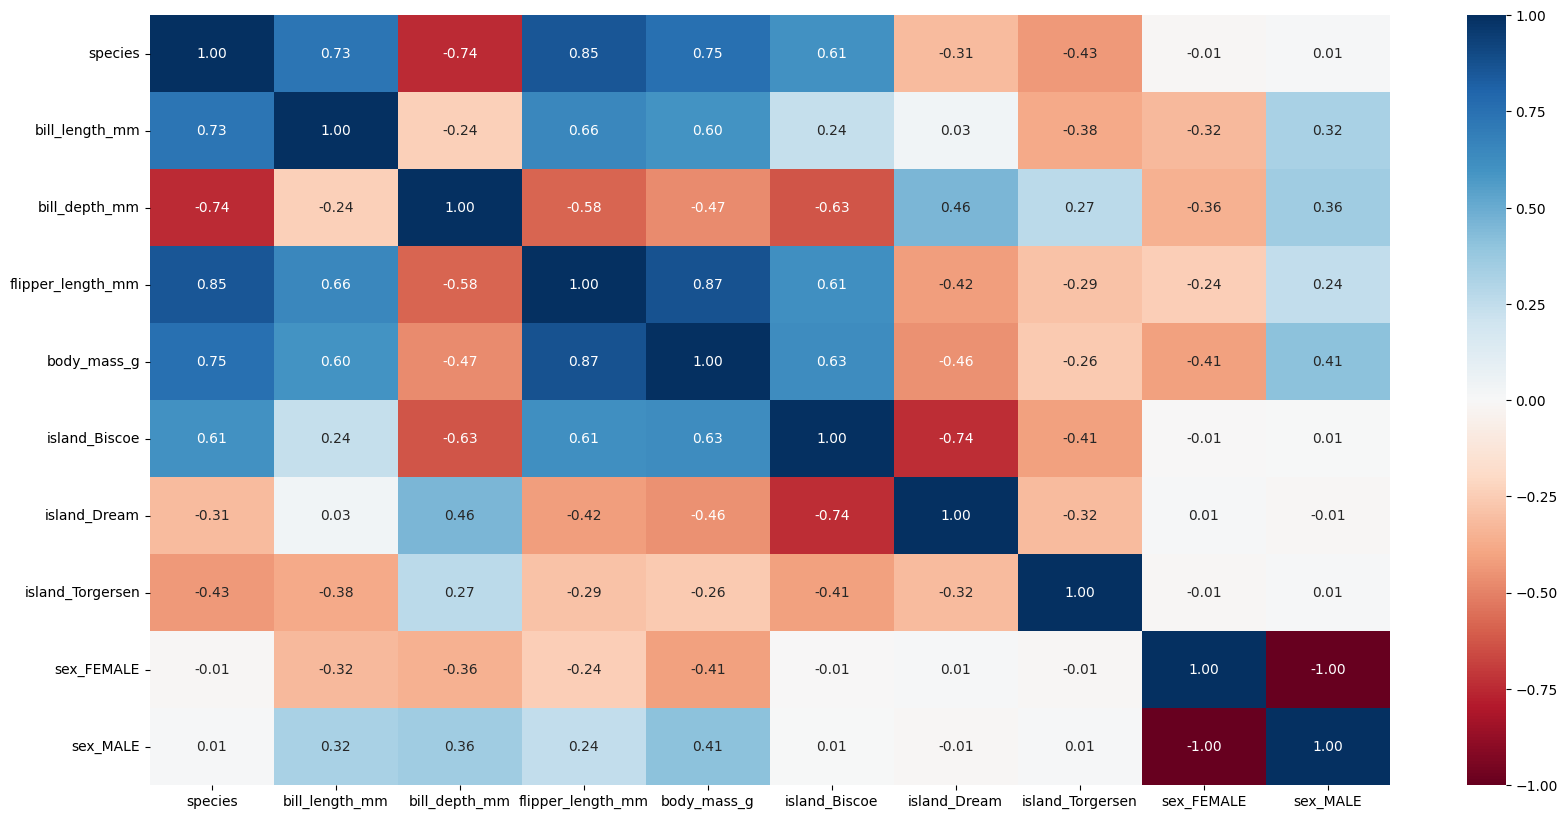

In [18]:
penguin_df_corr_matrix = penguin_df.corr()
print(penguin_df_corr_matrix['species'])
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(penguin_df.corr(numeric_only=True), cmap='RdBu', annot=True, fmt=".2f")

In [19]:
y = penguin_df.species.values
X = penguin_df.drop(['species'], axis=1)


In [20]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Normalizing the independent variables: Makes the convergence faster
X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0))
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0))

In [22]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [23]:

y_pred = logre.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.9855072463768116


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



[[35  0  0]
 [ 1 11  0]
 [ 0  0 22]]


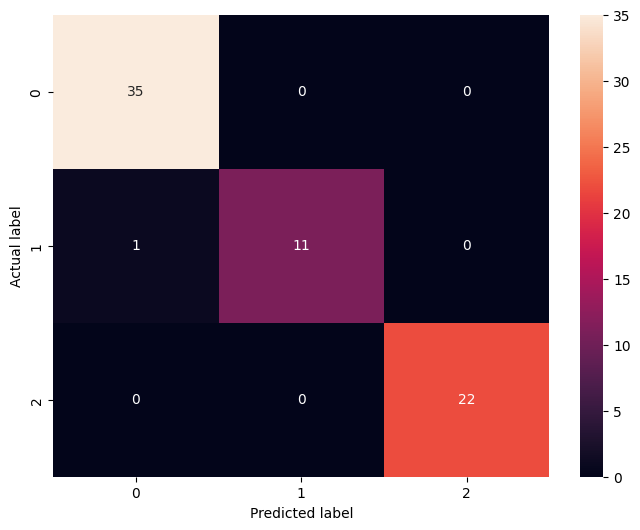

In [25]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.4g')
plt.xlabel('Predicted label');
plt.ylabel('Actual label');

/Users/manojadhikari/Documents/Second Semester/ML/projects/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/manojadhikari/Documents/Second Semester/ML/projects/ml_env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

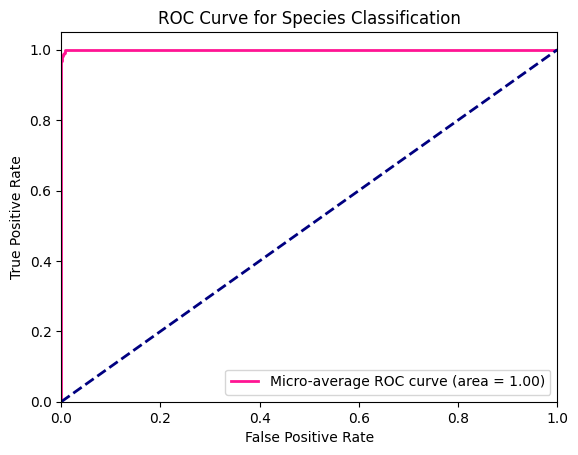

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming penguin_df is your DataFrame containing the penguin data

# Select features and target
X = penguin_df.drop('species', axis=1)
y = penguin_df['species']

# Binarize the target variable
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Initialize the classifier
classifier = OneVsRestClassifier(LogisticRegression())

# Fit the classifier
classifier.fit(X, y_bin)

# Get predicted probabilities
y_score = classifier.predict_proba(X)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, label='Micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Species Classification')
plt.legend(loc="lower right")
plt.show()
